#1 西瓜3.0a数据的K近邻算法实现

Xtrain.shape: (7, 2) , Xtest.shape: (10, 2)
Ytrain.shape: (7,) , Ytest.shape: (10,)


Done!
Accuracy: 100.00%
[]


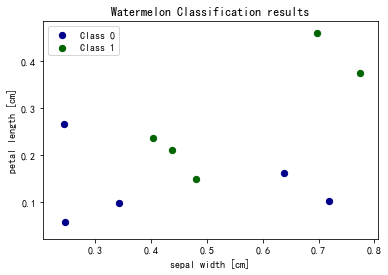

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

dataLoad = pd.read_csv('data/watermelon30a.txt', header=None)
x,y = dataLoad.values[:, :-1], dataLoad[2].tolist()
y = pd.Categorical(y).codes

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.45, random_state=123,
                                                    stratify=y)

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

print('Xtrain.shape:', train_x.shape, ', Xtest.shape:', test_x.shape)
print('Ytrain.shape:', train_y.shape, ', Ytest.shape:', test_y.shape)
# 
xtrain = tf.placeholder("float", [None, train_x.shape[1]])
xtest = tf.placeholder("float", [test_x.shape[1]])
# 
distance = tf.reduce_sum(tf.abs(tf.subtract(xtrain, xtest)), axis=1)
pred = tf.arg_min(distance, 0)
# 
accuracy = 0

init = tf.global_variables_initializer()

error_list = []
with tf.Session() as sess:
    sess.run(init)
    Ntest = len(test_x)
    for i in range(Ntest):
        nn_index = sess.run(pred, feed_dict={xtrain:train_x, xtest:test_x[i, :]})

        pred_class_label = np.argmax(train_y[nn_index])
        true_class_label = np.argmax(test_y[i])

        if pred_class_label == true_class_label:
            accuracy += 1
        else:
            error_list.append([pred_class_label, true_class_label, i])
    print("Done!")
    accuracy /= Ntest
    print("Accuracy: %.2f%%" % (100 * accuracy))
    print(error_list)

    colors = ["darkblue","darkgreen"]
    for n, color in enumerate(colors):
        idx = np.where(test_y == n)[0]
        plt.scatter(test_x[idx, 0],test_x[idx, 1],c=color, s =40, label="Class %s" % n)
    plt.figure(1,2,1, facecolor='w')
    plt.scatter(test_x[error_list, 0],test_x[error_list,1],c='darkred', s =40)
    plt.xlabel("sepal width [cm]")
    plt.ylabel("petal length [cm]")
    plt.legend(loc="upper left")
    plt.title("Watermelon Classification results")
    plt.show()

#2 鸢尾花数据两特征的K近邻算法分类实现

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/iris.data', header=None)
x = data.values[:, :2]
y = pd.Categorical(data[4]).codes

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, random_state=123,
                                                    stratify=y)
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

print('Xtrain.shape:', train_x.shape, ', Xtest.shape:', test_x.shape)
print('Ytrain.shape:', train_y.shape, ', Ytest.shape:', test_y.shape)
# 
xtrain = tf.placeholder("float", [None, train_x.shape[1]])
xtest = tf.placeholder("float", [test_x.shape[1]])
# 
distance = tf.reduce_sum(tf.abs(tf.add(xtrain, tf.negative(xtest))), axis=1)
pred = tf.arg_min(distance, 0)
# 
accuracy = 0

init = tf.global_variables_initializer()

error_list = []
with tf.Session() as sess:
    sess.run(init)
    Ntest = len(test_x)
    for i in range(Ntest):
        nn_index = sess.run(pred, feed_dict={xtrain:train_x, xtest:test_x[i, :]})
        pred_class_label = np.argmax(train_y[nn_index])
        true_class_label = np.argmax(test_y[i])

        if pred_class_label == true_class_label:
            accuracy += 1
        else:
            error_list.append([pred_class_label, true_class_label, i])
    print("Done!")
    accuracy /= Ntest
    print("Accuracy: %.2f%%" % (100 * accuracy))
    print(error_list)

Xtrain.shape: (105, 2) , Xtest.shape: (45, 2)
Ytrain.shape: (105,) , Ytest.shape: (45,)


Done!
Accuracy: 100.00%
[]


#3 Mnist手写数字数据集的K近邻实现

Extracting MNIST_data/train-images-idx3-ubyte.gz


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Xtrain.shape: (5000, 784) , Xtest.shape: (200, 784)
Ytrain.shape: (5000, 10) , Ytest.shape: (200, 10)


Done!
Accuracy: 93.50%
[[2, 3, 33], [1, 3, 34], [3, 8, 38], [5, 8, 39], [5, 8, 48], [5, 8, 54], [0, 8, 75], [3, 8, 87], [1, 7, 92], [3, 2, 115], [9, 8, 151], [9, 7, 182], [1, 7, 191]]
3
[33, 34, 38, 39, 48, 54, 75, 87, 92, 115, 151, 182, 191]


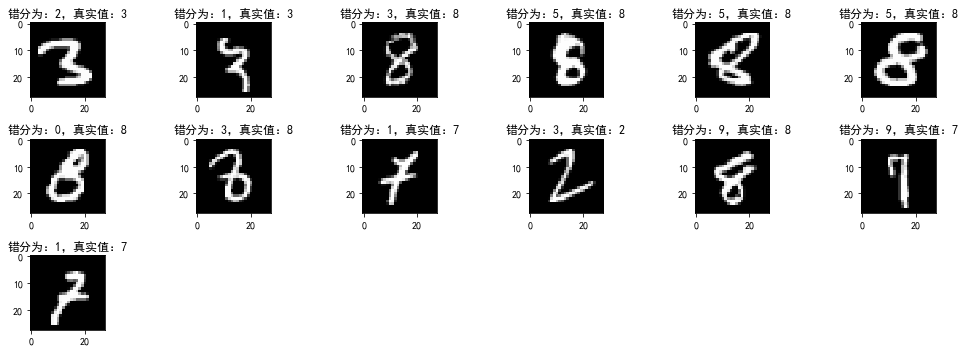

In [14]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Xtrain, Ytrain = mnist.train.next_batch(5000)
Xtest, Ytest = mnist.test.next_batch(200)

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

print('Xtrain.shape:', Xtrain.shape, ', Xtest.shape:', Xtest.shape)
print('Ytrain.shape:', Ytrain.shape, ', Ytest.shape:', Ytest.shape)

xtrain = tf.placeholder("float", [None, 784])
xtest = tf.placeholder("float", [784])

distance = tf.reduce_sum(tf.abs(tf.add(xtrain, tf.negative(xtest))), axis=1)
pred = tf.arg_min(distance, 0)

accuracy = 0

init = tf.global_variables_initializer()

error_list = []
with tf.Session() as sess:
    sess.run(init)
    Ntest = len(Xtest)
    for i in range(Ntest):
        nn_index = sess.run(pred, feed_dict={xtrain:Xtrain, xtest:Xtest[i, :]})
        pred_class_label = np.argmax(Ytrain[nn_index])
        true_class_label = np.argmax(Ytest[i])

        if pred_class_label == true_class_label:
            accuracy += 1
        else:
            error_list.append([pred_class_label, true_class_label, i])
    print("Done!")
    accuracy /= Ntest
    print("Accuracy: %.2f%%" % (100 * accuracy))
    print(error_list)
    plt.figure(figsize=(14, 5), facecolor='w')

    h_count = 6
    v_count = int(len(error_list) / h_count + 1)
    print(v_count)
    errIndex = [x[2] for x in error_list]
    # errIndex=[1,2,3,4,5,6,7,8]
    print(errIndex)
    index1 = 0
    for index, image in enumerate(mnist.test.images):
        if index in errIndex:
            plt.subplot(v_count, h_count, index1 + 1)
            first_image = np.array(image)
            pixels = first_image.reshape((28, 28))
            plt.imshow(pixels, cmap='gray')
            plt.title(u'错分为：%i，真实值：%i' % (error_list[index1][0], error_list[index1][1]))
            index1 += 1

        if index1 >= len(errIndex):
            break
    plt.tight_layout()
    plt.show()

#4 非线性回归

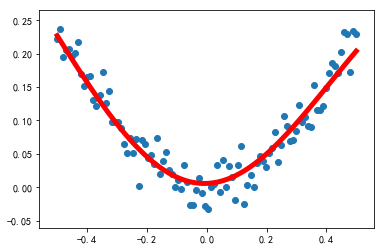

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from sklearn.model_selection import train_test_split

# x_data = np.linspace(-3, 3, 10)[:,np.newaxis]
# noise = np.random.normal(0, 0.02, x_data.shape)
# y_data = np.sin(4 * x_data) + x_data + noise

x_data = np.linspace(-0.5, 0.5, 100)[:, np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

Weights_L1 = tf.Variable(tf.random_normal([1, 10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x, Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

Weights_L2 = tf.Variable(tf.random_normal([10, 1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

loss = tf.reduce_mean(tf.square(y - prediction))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(4000):
        sess.run(train_step, feed_dict={x:x_data, y:y_data})

    prediction_value = sess.run(prediction, feed_dict={x:x_data})
    plt.figure(facecolor='w')
    # X_train.sort(axis=0)
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value, 'r-', lw=5)
    plt.show()

#5 线性回归

~~~~~~~开始设计计算图~~~~~~~


~~~~~~~设计计算图结束~~~~~~~
~~~~~~~开启会话~~~~~~~


Step: 0100 train_loss= 0.249131054 W= [ 0.83408737] , b= [ 0.17165874]


Step: 0200 train_loss= 0.372145176 W= [ 0.89872378] , b= [ 0.26355448]


Step: 0300 train_loss= 0.418127120 W= [ 0.90426892] , b= [ 0.30965266]


Step: 0400 train_loss= 0.440072596 W= [ 0.90500557] , b= [ 0.3325597]


Step: 0500 train_loss= 0.451024145 W= [ 0.90521789] , b= [ 0.34392586]


Step: 0600 train_loss= 0.456495821 W= [ 0.90531152] , b= [ 0.34956449]


Step: 0700 train_loss= 0.459221303 W= [ 0.90535694] , b= [ 0.35236147]


Step: 0800 train_loss= 0.460576326 W= [ 0.90537953] , b= [ 0.3537491]


Step: 0900 train_loss= 0.461249322 W= [ 0.90539074] , b= [ 0.35443732]


Step: 1000 train_loss= 0.461583495 W= [ 0.9053964] , b= [ 0.35477889]
~~~~~~~训练结束~~~~~~~


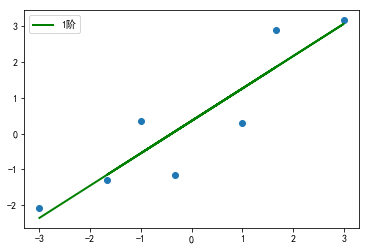

In [16]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib as mpl

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

N = 10
N1 = 6
x = np.linspace(-3, 3, N)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

X = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)
print('~~~~~~~开始设计计算图~~~~~~~')
with tf.Graph().as_default():
    with tf.name_scope('Input'):
        X = tf.placeholder(tf.float32)
        Y_true = tf.placeholder(tf.float32)

    with tf.name_scope('Inference'):
        W = tf.Variable(tf.zeros([1]))
        b = tf.Variable(tf.zeros([1]))

        # 前向预测模型 inference
        Y_pred = tf.add(tf.multiply(X, W), b) # w * x + b

    with tf.name_scope('Loss'):
        # Loss - MSE损失   
        TrainLoss = tf.reduce_mean(tf.pow(Y_true - Y_pred, 2)) / 2

    with tf.name_scope('Train'):
        # 反向梯度计算
        Optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        TrainOp = Optimizer.minimize(TrainLoss)

    with tf.name_scope('Evaluate'):
        # 添加评估节点
        EvaluteLoss = tf.reduce_mean(tf.pow(Y_true - Y_pred, 2)) / 2

    InitOp = tf.global_variables_initializer()

    # writer = tf.summary.FileWriter(logdir='logs', graph=tf.get_default_graph())
    # writer.close()
    print('~~~~~~~设计计算图结束~~~~~~~')
    print('~~~~~~~开启会话~~~~~~~')
    sess = tf.Session()
    sess.run(InitOp)

    for step in range(1000):
        for tx, ty in zip(X_train, y_train):
            _, train_loss, train_w, train_b = sess.run([TrainOp, TrainLoss, W, b], feed_dict={X:tx, Y_true:ty})

        if (step + 1) % 100 == 0:
            print("Step:", "%04d" % (step + 1), "train_loss=", "{:.9f}".format(train_loss), "W=", train_w, ", b=", train_b)

    print('~~~~~~~训练结束~~~~~~~')
    plt.plot(X_train, y_train, 'o')
    plt.plot(X_train, train_w * X_train + train_b, 'g-', linewidth=2, label="1阶")

    plt.legend(loc='best')
    plt.show()

#6 Mnist手写数字-计算图

In [17]:
import os
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import argparse
import sys

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

def main(_):
    print('~~~~~开始设计计算图')
    with tf.Graph().as_default():
        with tf.name_scope('Input'):
            X = tf.placeholder(tf.float32, shape=[None, 784], name='X')
            Y_true = tf.placeholder(tf.float32, shape=[None, 10], name='Y_true') # 10个神经元

        with tf.name_scope('Inference'):
            W = tf.Variable(tf.zeros([784, 10]), name="Weight")
            b = tf.Variable(tf.zeros([10]), name="Bias")
            logits = tf.add(tf.matmul(X, W), b)
            with tf.name_scope('Softmax'):
                Y_pred = tf.nn.softmax(logits=logits)

        with tf.name_scope('Loss'):
            TrainLoss = tf.reduce_mean(-tf.reduce_sum(Y_true * tf.log(Y_pred), axis=1))

        with tf.name_scope('Train'):
            Optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
            TrainOp = Optimizer.minimize(TrainLoss)

        with tf.name_scope('Evaluate'):
            correct_prediction = tf.equal(tf.argmax(Y_pred, 1), tf.argmax(Y_true, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        InitOp = tf.global_variables_initializer()
        # 
        # with tf.name_scope('Evaluate'):
        #     EvalLoss = tf.reduce_mean(tf.pow((Y_pred - Y_true), 2)) / 2

        print('~~~~~将计算图写入事件文件~~~~~')
        writer = tf.summary.FileWriter(logdir='logs/mnist_softmax', graph=tf.get_default_graph())
        writer.close()
        print('~~~~~开始运行计算图~~~~~')
        mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)
        sess = tf.InteractiveSession()
        sess.run(InitOp)

        for step in range(1000):
            batch_xs, batch_ys = mnist.train.next_batch(100)
            _, train_loss, train_W, train_b = sess.run([TrainOp, TrainLoss, W, b],
                                                       feed_dict={X:batch_xs, Y_true: batch_ys})
            # print("train step:", step, ", train_loss:", train_loss)

        accuracy_score = sess.run(accuracy,feed_dict={X: mnist.test.images,
                                                      Y_true: mnist.test.labels})
        y_predd = sess.run(Y_pred,feed_dict={X: mnist.test.images,
                                             W: train_W, b : train_b})
        print("模型准确率：", accuracy_score)
        y_pre = sess.run(tf.argmax(y_predd, 1))
        y_tru = sess.run(tf.argmax(mnist.test.labels, 1))

        result = y_pre == y_tru

        print(len(result[result == True]) / len(y_predd))

if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    #为参数解析器添加参数：data_dir(指定数据集存放路径)
    parser.add_argument('--data_dir', type=str,
                        default='MNIST_data/',  #参数默认值
                        help='数据集存放路径')
    FLAGS, unparsed = parser.parse_known_args() #解析参数
    #运行TensorFlow应用
    tf.app.run(main=main, argv=[sys.argv[0]] + unparsed)

~~~~~开始设计计算图
~~~~~将计算图写入事件文件~~~~~


~~~~~开始运行计算图~~~~~
Extracting MNIST_data/train-images-idx3-ubyte.gz


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


模型准确率： 0.8706
0.8706


SystemExit: 

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
